# IMPORT VARI

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 2.0))

with open('data/heroes.csv', 'r') as heroes_file:
  heroes_reader = csv.reader(heroes_file, delimiter=';', quotechar='"')
  heroes = list(heroes_reader)[1:]

# LEZIONE 1: ROBACCIA DI PYTHON VARIA

### Slicing e accesso posizionale
- "Gli slicing basati su indice comprenderanno il primo e l'ultimo valore specificato mentre gli slice basati su posizione escluderanno l'ultimo elemento.
    - ```first_appearance['Wonder Girl':'Wonder Woman']```
    - ```first_appearance[60:63]```
- L'accesso posizionale può anche fare riferimento a numeri negativi, contando in analogia a liste e tuple a partire dall'ultimo elemento
    - ```first_appearance[-5:]```
- L'accesso alle liste può anche essere fatto specificando una lista (ma non una tupla) di posizioni al posto di una sola posizione, con l'effetto di ottenere i corrispondenti elementi.
    - ```first_appearance[[1, 42, 709]]```
- vi sono anche funzioni come .head() e .tail()
si può utilizzare una lista di valori booleani in cui True indica gli elementi da estrarre e False quelli da filtrare:
    - ```first_appearance[[1970 <= y <1975 for y in first_appearance]]```
- Infine, è possibile effettuare delle query su una serie specificando tra parentesi quadre un'espressione logica che indica quali elementi visualizzare, utilizzando la serie come simbolo che ne indica un suo generico elemento:
    - ```first_appearance[first_appearance > 2010]```
    - Se voglio fare altre condizioni, devo per forza utilizzare l'and bitwise:
    - ```first_appearance[(first_appearance>2010)and(first_appearance%2==1)]``` NON VA BENE
    - ```first_appearance[(first_appearance>2010)&(first_appearance%2==1)]```

# LEZIONE 2 PANDAS

### Series
- Una delle classi principali implementate in pandas è Series.

In [2]:
years = [int(h[7]) if h[7] else None for h in heroes]
names = [h[0] for h in heroes]
first_appearance = pd.Series(years, index = names)

- possiamo filtrare roba come visto negli appunti sopra su python
- value_counts() restituisce un'altra serie in cui gli indici sono i valori osservati e i valori le corrispondenti frequenze assolute, ordinate in senso non crescente:

In [3]:
absolutes=first_appearance.value_counts()
absolutes

1964.0    18
1963.0    18
1965.0    14
2004.0    11
1975.0    10
          ..
2013.0     1
1983.0     1
1933.0     1
1948.0     1
1988.0     1
Name: count, Length: 71, dtype: int64

### Visualizzazione Grafia Serie

- ```.plot()``` permette di visualizzare graficamente i contenuti di una serie, utilizzando matplotlib dietro le quinte; in particolare, il metodo bar visualizza un grafico a barre
- ```.show()``` permette di mostrarlo poi a video
- fare solamente cosi molte volte fa schifo, il grafico viene illeggibile. Lavorare con i valori assoluti molte volte e' meglio
- Cosi ancora non è il massimo. Son necessarie piu informazioni:

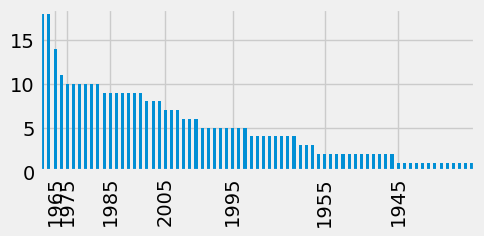

In [4]:
years = np.arange(1945, 2010, 10)
index_pos = [absolutes.index.get_loc(y) for y in years]
absolutes.plot.bar()
plt.xticks(index_pos, years)
plt.ylim((0, 18.5))
plt.show()

- Per generare il grafico precedente è necessario utilizzare alcune funzionalità avanzate delle librerie considerate: 
  - `np.arange` permette di costruire un array i cui valori vanno di dieci in dieci partendo da 1945 e arrivando a 2005; la proprietà 
  - `index` di una serie permette di estrarne l'indice e il metodo 
  - `get_loc` di quest'ultimo restituisce la posizione corrispondente a un dato valore dell'indice. 
  - Infine, il metodo `xticks` di matplotlib permette di specificare quali valori evidenziare sull'asse delle ascisse e quali etichette utilizzare.

# LEZIONE 3 DATAFRAME

# LEZIONE 4

- Ripartizione Empirica -> Diagramma a scalini (Funzione costante a tratti)
- **CAMPIONE** = insieme di dati su cui mi baso per le mie analisi statistiche
    - Ripartizione Empirica ci permette di generare un grafico a scaletta.
    - Prende anche il nome di **Funzione di distribuzione cumulativa empirica**

- scegliere un campione in modo rappresentativo significa non fare "favoritismi": Non posso estrarre chi mi fa comodo, tutti devono avere la stessa chance di finire nel mio campione.

## POSIZIONE E CENTRALITA

### MEDIA CAMPIONARIA

- calcolabile solamente per i dati **quantitativi**
- mi permette di rappresentare qualcosa con un solo valore.

#### Caratteristiche Media Campionaria
- la media campionaria SOFFRE parecchio gli outlier ( ovvero valori o troppo alti o troppo bassi rispetto al campione )
- Spesso e volentieri non corrisponde ad alcun valore del campione

##### Traslazione
- Se ho una media calcolata (m) di un campionario C={x1,...,xn} e traslo gli elementi di un valore +n allora anche la media viene traslata di +n

##### Scalabilità
- Se ho una media calcolata (m) di un campionario C={x1,...,xn} e scalo gli elementi di un valore n allora anche la media viene scalata di n

##### Trasformazioni Afffini
- stesso discorso vale per le trasformazioni affini 

#### Esempio

MEAN VALUE IS 1.6



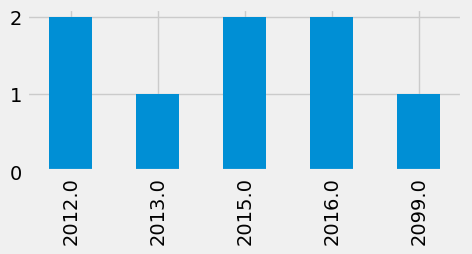

In [5]:
absolutes=first_appearance[(first_appearance>2011)].value_counts().sort_index()
print("MEAN VALUE IS "+str(absolutes.mean()))
print()
absolutes.plot.bar()
plt.show()

### MEDIANA CAMPIONARIA
- non è influenzata dagli outlier
- la mediana è il valore precisamente al centro del mio campione **ordinato**
- se il valore è pari non ho un valore centrale bensi due quindi in quel caso bisogna **calcolare la media dei due valori**. Questa procedura va bene per i dati di tipo **quantitativi e qualitativi**

#### ESEMPIO

In [6]:
print("MEDIAN VALUE IS "+str(absolutes.median()))
print()
absolutes

MEDIAN VALUE IS 2.0



2012.0    2
2013.0    1
2015.0    2
2016.0    2
2099.0    1
Name: count, dtype: int64

### MODA CAMPIONARIA
- non è altro che il valore che si presenta con maggior frequenza

In [7]:
print("MODA VALUE IS "+str(absolutes.max()))
print()
absolutes

MODA VALUE IS 2



2012.0    2
2013.0    1
2015.0    2
2016.0    2
2099.0    1
Name: count, dtype: int64

## DISPERSIONE

### VARIAZIONE CAMPIONARIA
- Consideriamo:
    - Campione A = {1,2,5,6,6}
    - Campione B = {-40,0,5,20,35}
- otteniamo facilmente che
    - media campionaria A = 4
    - media campionaria B = 4
- Entrambi i valori si concentrano su 4 ma si disperdono in modo completamente diverso
- per calcolare la dispersione utilizziamo la formula della **varianza campionaria**
- Di seguito la funzione riportata

\begin{equation}
\hat F(x) = \frac{\# \{ x_i \leq x \}}{n}
= \frac{1}{n} \sum_{i=1}^n \mathrm I_{(-\infty, x]}(x_i) ,
\end{equation}

- $\mathrm I_A: \mathbb R \mapsto \{0, 1\}$ indica la _funzione indicatrice_ dell'insieme $A$, che assume valore nullo in corrispondenza di tutti gli argomenti che non appartengono ad $A$ e valore unitario altrimenti, e $(-\infty, x]$ indica l'intervallo semiaperto identificato da tutti i valori reali minori o uguali a $x$. Per un generico argomento $x$, la funzione cumulativa empirica assumerà pertanto come valore la frequenza relativa cumulata del più grande tra i valori osservati $x_i \leq x$.
- Dunque il suo grafico sarà quello di una funzione costante a tratti. In python è presente un'implementazione della funzione cumulativa empirica nel modulo `statmodels.api`: la funzione `distributions.ECDF` accetta come input un insieme di osservazioni e restituisce la corrispondente funzione cumulativa empirica. Possiamo quindi elaborare in tal senso gli anni di prima apparizione e visualizzare il grafico corrispondente agli anni tra il 1980 e il 1990, così da poter effettuare un confronto con l'analogo grafico precedentemente generato:

#### TRASLAZIONE
- rimange invariata, la traslazione di valori del campione non comporta alcuna modifica con la varianza.
- questa varianza, viene identificata con "s" e il suo valore ha come unita di misura quella base al quadrato. 
- se voglio ottenere una vairanza con unita di misura uguale all'originale, calcolo la radice quadrata. Cosi facendo ottengo la **deviazione standard**
- Esempio

In [8]:
print("varianza: "+str(absolutes.var()))
traslate=absolutes+3
print("varianza: traslata: "+str(traslate.var()))

varianza: 0.3
varianza: traslata: 0.3


#### SCALABILITA
- Se voglio verificare la scalablità per un valore b, ottengo che la varianza campionaria cambia (non ricordo la formula per calcolare quanto viene traslata )
- Esempio:

In [9]:
print("varianza: "+str(absolutes.var()))
traslate=absolutes*3
print("varianza scalata: "+str(traslate.var()))

varianza: 0.3
varianza scalata: 2.7


## DEVIAZIONE STANDARD
- detta in parole molto brutte, non è altro che la radice quadrata della varianza
- infatti:

In [10]:
print("varianza: "+str(absolutes.var()))
print("varianza: "+str(absolutes.std()))

varianza: 0.3
varianza: 0.5477225575051661


#### TRASLAZIONE
- come per la varianza, rimane invariata chiaramente:
- Esempio:

In [11]:
print("STD: "+str(absolutes.std()))
traslate=absolutes+3
print("STD traslata: "+str(traslate.std()))

STD: 0.5477225575051661
STD traslata: 0.5477225575051661


#### SCALABILITA
- come per la varianza, varia:
- Esempio:

In [12]:
print("STD: "+str(absolutes.std()))
traslate=absolutes*3
print("STD SCALATA: "+str(traslate.std()))

STD: 0.5477225575051661
STD SCALATA: 1.6431676725154984


### COEFF. DI VARIAZIONE
- Il coefficiente di variazione (CV) è una misura di statistica descrittiva che aiuta a quantificare in modo oggettivo quanto sia grande il valore di una deviazione standard rispetto alla sua media.
- si calcola nel seguente modo:
\begin{equation}
\frac{std}{media}
\end{equation}
- Esempio:

In [13]:
print("STD: "+str(absolutes.std()))
print("COEFF VARIAZIONE: "+str(absolutes.std()/absolutes.mean()))

STD: 0.5477225575051661
COEFF VARIAZIONE: 0.34232659844072877


### PERCENTILE CAMPIONARIO
- dipende dal "livello" p dove questo p è un numero che esprime una percentuale.
- se al posto di percentuale, il livello lo esprimo in
    - 0, ... ,1  -> parlo di **quantili**
    - 0, ... ,4 ->  parlo di **quartili**
    - 0, ... ,10 -> parlo di **decili**
- posso vedere informazioni su percentili e altro con il metodo .describe

In [14]:
heroes = pd.read_csv('data/heroes.csv', sep=';', index_col=0)
year = heroes['First appearance']
year.describe() 

count     367.000000
mean     1979.855586
std        19.717218
min      1933.000000
25%      1965.000000
50%      1979.000000
75%      1994.000000
max      2099.000000
Name: First appearance, dtype: float64

- se voglio accedere ad un particolare livello di quantile posso fare in questo modo

In [15]:
print(year.quantile(.15))
print(year.quantile(.75))

1963.0
1994.0


### BOX PLOT
- è una rappresentazione grafica che riassume le principali caratteristiche di un campione di dati.
- Tale rappresentazione contiene due componenti principali:
    - una _scatola_, intesa come un rettangolo che evidenzia il primo e il terzo quartile campionario dei dati, che corrispondono alle due basi, e la mediana, indicata tramite un segmento parallelo alle basi stesse;
    - due _baffi_, che si estendono dagli estremi della scatola fino a raggiungere il minimo e il massimo valore osservato.

- A titolo di esempio la cella seguente visualizza il box plot relativo all'anno di prima apparizione.

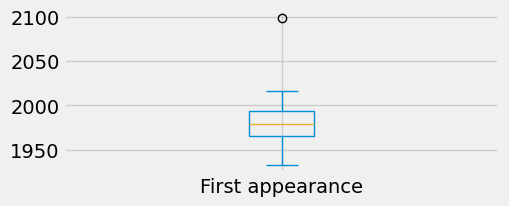

In [16]:
year.plot.box()
plt.show()

- Questo grafico mette in evidenza:
    - la centralità delle osservazioni, tramite il segmento che individua la mediana campionaria;
    - la dispersione delle osservazioni:
        - sia in termini di range interquartile (l'altezza della scatola)
        - che di intervallo di variazione dei dati (la distanza tra gli estremi dei baffi).
- Vale la pena sottolineare che la presenza di eventuali valori mancanti non influisce sulla generazione del grafico.
- necessario specificare "whis" ( whiskers, baffi ) per non mostrare gli outliers ( i cerchietti ). ( da me non funziona, chiedere al prof )
- Il BOX PLOT si puo anche generare verticalmente:

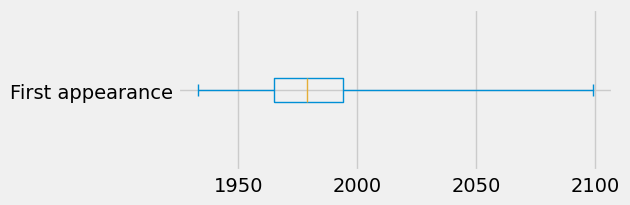

In [17]:
year.plot.box(vert=False,whis=10) # mettendo un valore numerico funziona, forse il range viene specificato con un valore ora? idk
plt.show()